In [1]:
from config import *
from dataset import *

In [2]:
DATA_DIR = "/media/pavlos/HDD/Datasets/TeslaPilot/carla"
train_set = CarlaDataset(
  base_dir=DATA_DIR,
  townslist=TRAIN_TOWN_LIST+EVAL_TOWN_LIST,
  image_size=IMAGE_SIZE,
  use_imagenet_norm=USE_IMAGENET_NORM,
  sequence_size=SEQUENCE_SIZE
)

[CarlaDataset] Loading Town07: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]  


In [3]:
sample = train_set[0]
for k, v in sample[0].items():
  print(k, v.shape)
print("targets", sample[1].shape)
print(sample[1])

rgb_left torch.Size([3, 8, 224, 224])
rgb_front torch.Size([3, 8, 224, 224])
rgb_right torch.Size([3, 8, 224, 224])
steer_weight torch.Size([5])
accel_weight torch.Size([5])
states torch.Size([8, 7])
commands torch.Size([8, 6])
targets torch.Size([5, 2])
tensor([[ 0.5000,  0.4150],
        [ 0.5000,  0.4141],
        [ 0.5000,  0.4142],
        [ 0.5001,  0.4143],
        [ 0.5001, -0.5395]])


In [3]:
from tqdm import tqdm
from torch.utils.data import DataLoader

steer_values = []
throttle_values = []

train_loader =  DataLoader(train_set, batch_size=1, num_workers=8)
for data in (t := tqdm(train_loader)):
    _, targets = data
    steer_values.append(targets[0][0][0])       # B, timestep, steer
    throttle_values.append(targets[0][0][1])    # B, timestep, pedal_acceleration

100%|██████████| 79906/79906 [48:26<00:00, 27.49it/s]  


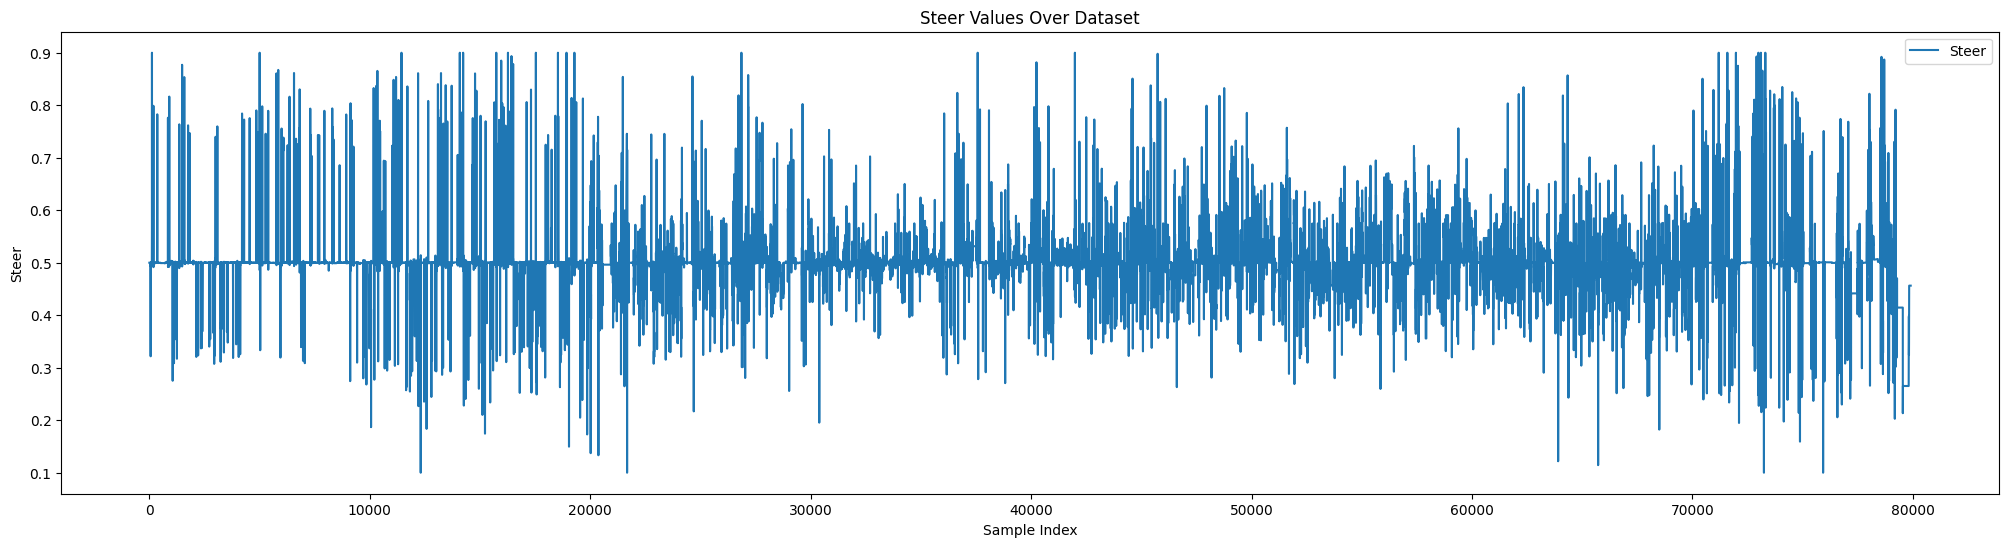

In [4]:
import matplotlib.pyplot as plt

# plot steer values
plt.figure(figsize=(25, 6))  # One figure
plt.plot(np.array(steer_values), label="Steer")  # One plot line
# plt.ylim(-1.0, 1.0)
plt.title("Steer Values Over Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Steer")
plt.legend()
plt.show()

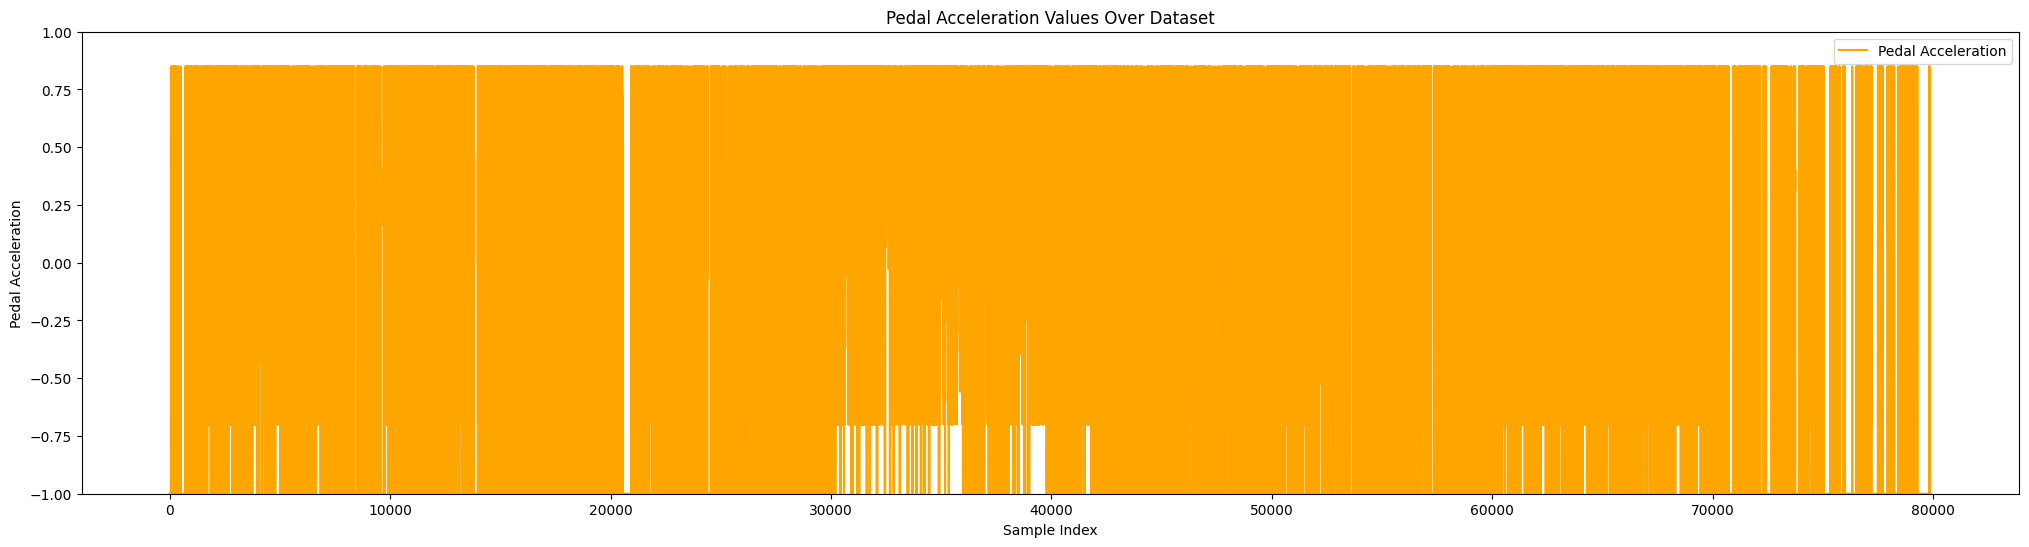

In [5]:
# plot pedal acc values
plt.figure(figsize=(25, 6))  # Adjust width as needed
plt.plot(throttle_values, label="Pedal Acceleration", color="orange")
plt.ylim(-1.0, 1.0)
plt.title("Pedal Acceleration Values Over Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Pedal Acceleration")
plt.legend()
plt.show()

In [19]:
import numpy as np

targets = np.array(train_set.targets)
steers = targets[:, 0]
pedal_accs = targets[:, 1]

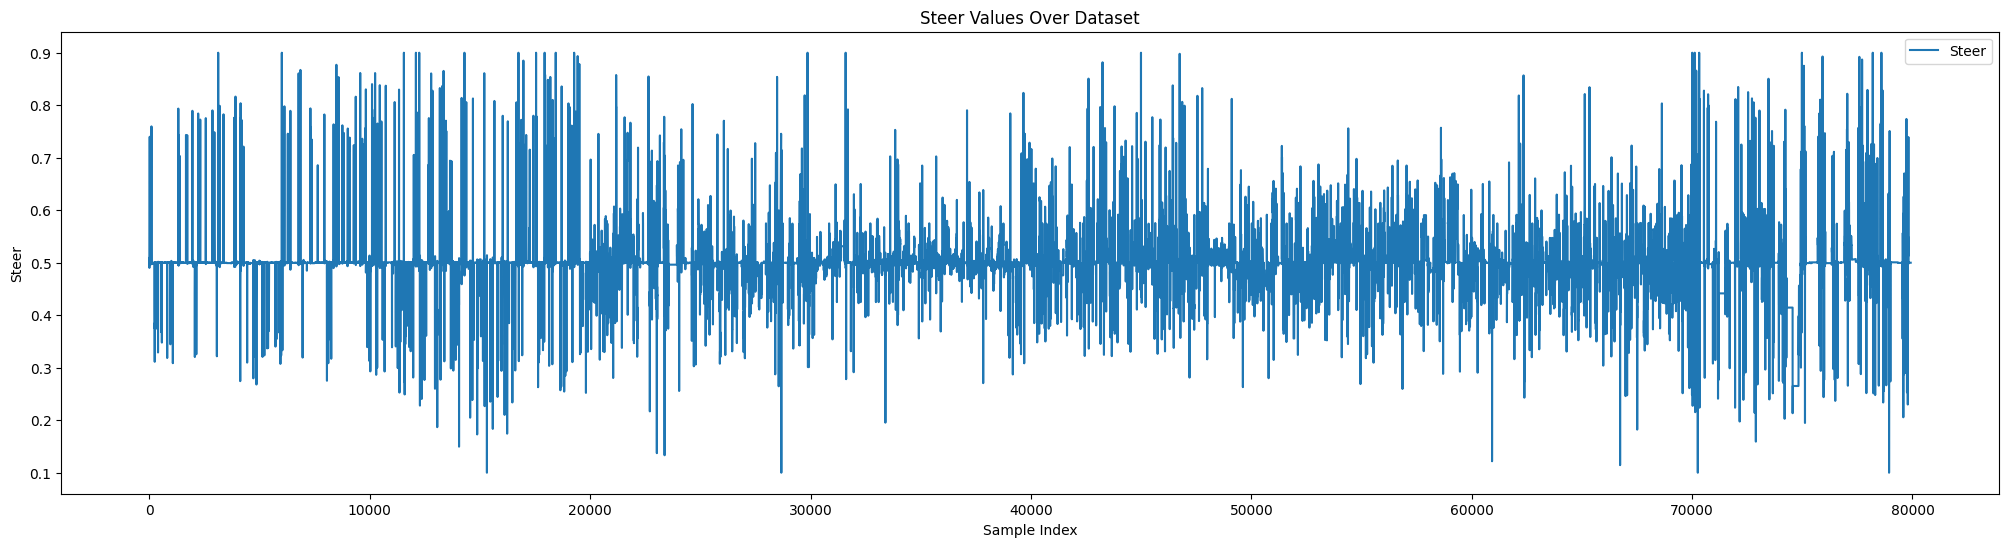

In [20]:
import matplotlib.pyplot as plt

# plot steer values
plt.figure(figsize=(25, 6))  # One figure
plt.plot(np.array(steers), label="Steer")  # One plot line
# plt.ylim(-1.0, 1.0)
plt.title("Steer Values Over Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Steer")
plt.legend()
plt.show()

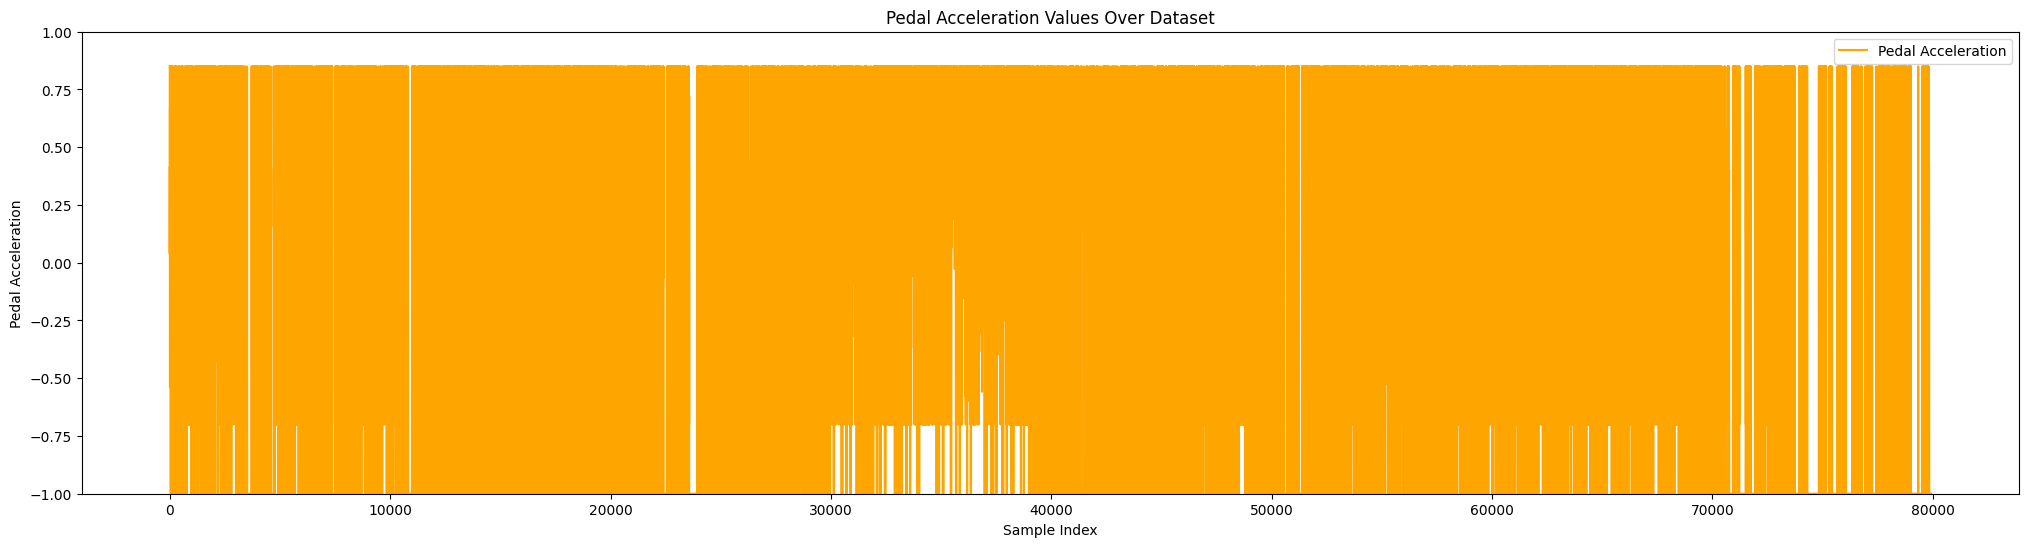

In [21]:
# plot pedal acc values
plt.figure(figsize=(25, 6))  # Adjust width as needed
plt.plot(pedal_accs, label="Pedal Acceleration", color="orange")
plt.ylim(-1.0, 1.0)
plt.title("Pedal Acceleration Values Over Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Pedal Acceleration")
plt.legend()
plt.show()

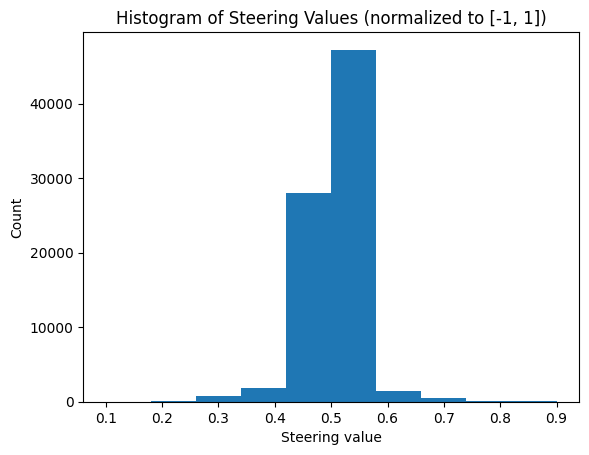

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(steers, bins=10)
plt.xlabel("Steering value")
plt.ylabel("Count")
plt.title("Histogram of Steering Values (normalized to [-1, 1])")
plt.show()

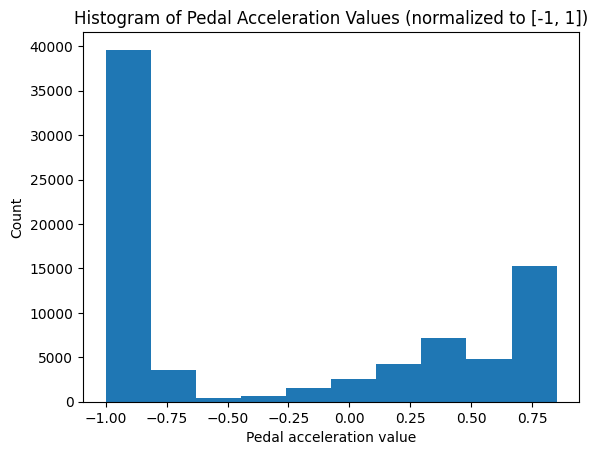

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(pedal_accs, bins=10)
plt.xlabel("Pedal acceleration value")
plt.ylabel("Count")
plt.title("Histogram of Pedal Acceleration Values (normalized to [-1, 1])")
plt.show()